In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal

In [15]:
# def create_network(num_input_neurons):
#     model = Sequential()
#     model.add(Dense(1, input_shape=(num_input_neurons,), kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
#     return model
def create_network(num_input_neurons):
    model = Sequential()
    model.add(Dense(1, input_shape=(num_input_neurons,), activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
    return model

In [16]:
# Generate random input data with shape (num_samples, num_input_neurons)
num_samples = 10000
input_data = np.random.uniform(low=-1, high=1, size=(num_samples, 1))

# List of numbers of input neurons to create networks with
num_input_neurons_list = [1, 5, 10, 50, 100]

# List to store the outputs of the networks
outputs = []

# Loop through each number of input neurons
for num_input_neurons in num_input_neurons_list:
    model = create_network(num_input_neurons)
    input_data_repeated = np.repeat(input_data, num_input_neurons, axis=1)
    output = model.predict(input_data_repeated)
    outputs.append(output)

313/313 [==============================] - 0s 1ms/step


In [17]:
def sum_of_relu_outputs(num_input_neurons, num_samples=10000):
    # Generate random input data with shape (num_samples, num_input_neurons)
    input_data = np.random.normal(size=(num_samples, num_input_neurons))

    # Apply the ReLU activation function to the input data
    relu_outputs = np.maximum(0, input_data)

    # Compute the sum of the ReLU outputs along the input neuron axis
    sum_outputs = np.sum(relu_outputs, axis=1)

    return sum_outputs


In [18]:
num_input_neurons_list = [1, 5, 10, 50, 100]
sum_outputs_list = [sum_of_relu_outputs(n) for n in num_input_neurons_list]


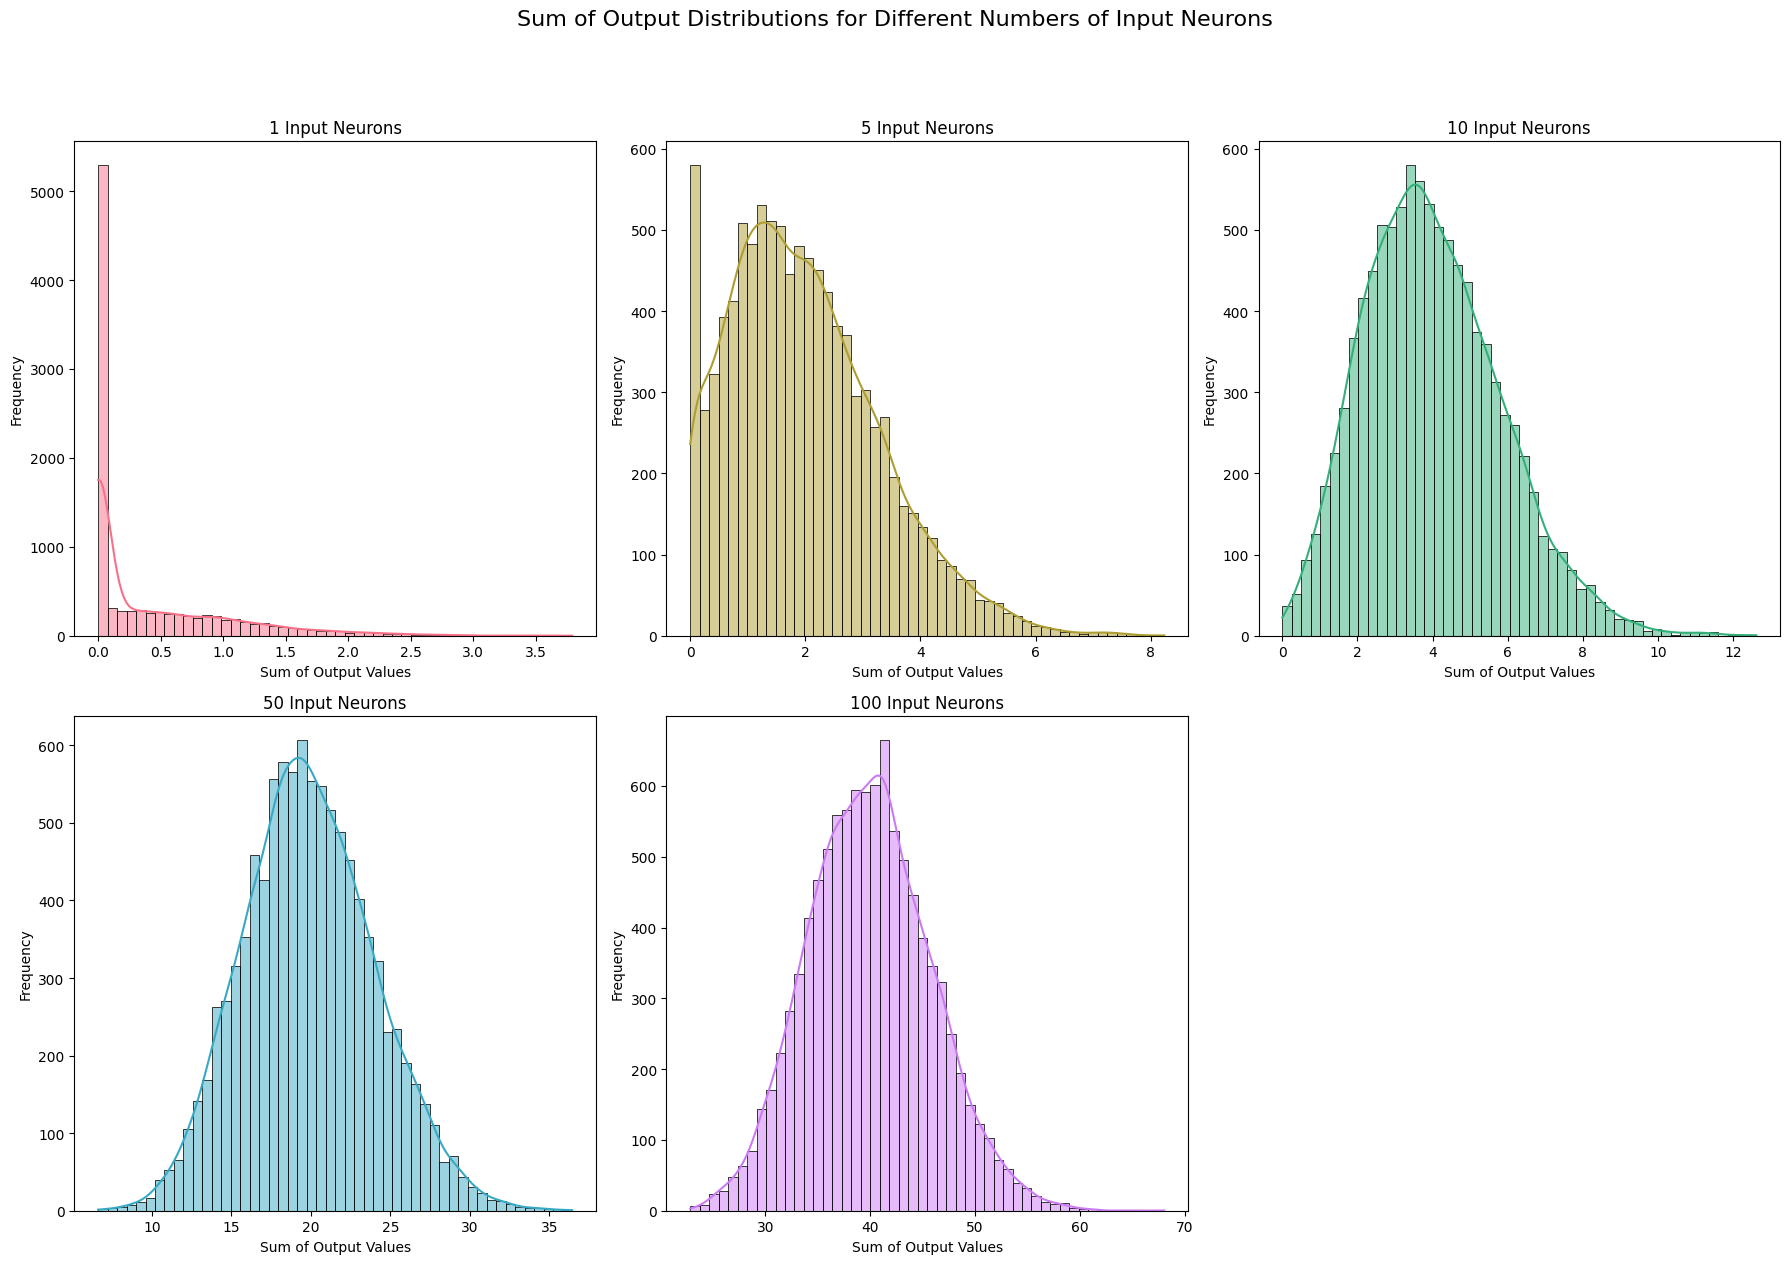

In [19]:
# Set the color palette to use for the plots
colors = sns.color_palette("husl", 5)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Loop through the outputs and plot the distributions on separate subplots
for i, sum_outputs in enumerate(sum_outputs_list):
    sns.histplot(sum_outputs, kde=True, bins=50, color=colors[i], ax=axes[i])
    axes[i].set_title(f'{num_input_neurons_list[i]} Input Neurons')
    axes[i].set_xlabel('Sum of Output Values')
    axes[i].set_ylabel('Frequency')

# Remove the extra subplot
axes[-1].axis('off')

# Set the main title for all subplots
fig.suptitle('Sum of Output Distributions for Different Numbers of Input Neurons', fontsize=16, y=1.05)

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()
